In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [107]:
# train_dataset_path = './dataset/dataset-raw-asli/train_preprocess.tsv'
# valid_dataset_path = './dataset/dataset-raw-asli/valid_preprocess.tsv'

train_dataset_path = './dataset/train_preprocess_no_stemming.csv'
valid_dataset_path = './dataset/valid_preprocess_no_stemming.csv'

In [108]:
# train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
# valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)

# train_df.columns = ['text', 'label']
# valid_df.columns = ['text', 'label']

train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)

train_df.columns = ['label', 'tweet_tokens_no_stemming']
valid_df.columns = ['label', 'tweet_tokens_no_stemming']

In [109]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [110]:
train_df.head(10)

,label,tweet_tokens_no_stemming
0,positive,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,neutral,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,positive,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,positive,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,negative,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
5,positive,"['makanan', 'beragam', 'harga', 'makanan', 'fo..."
6,negative,"['pakai', 'kartu', 'kredit', 'baca', 'tidak', ..."
7,positive,"['unik', 'bagus', 'foto-foto', 'makanan', 'ena..."
8,positive,"['keluarga', 'menikmati', 'pengalaman', 'kulin..."
9,positive,['bersyukur']


In [111]:
def get_label_idx(label):
    if label == 'positive':
        return 2
    if label == 'negative':
        return 1
    if label == 'neutral':
        return 0
train_df['label'] = train_df['label'].apply(get_label_idx)
valid_df['label'] = valid_df['label'].apply(get_label_idx)


In [112]:
train_df

,label,tweet_tokens_no_stemming
0,2,"['warung', 'dimiliki', 'pengusaha', 'pabrik', ..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'jangan-jangan', 'sombong..."
...,...,...
10996,2,"['enak', 'masakan', 'kepiting', 'menyenangkan'..."
10997,0,"['hormati', 'partaipartai', 'berkoalisi']"
10998,1,"['pagi', 'pagi', 'tol', 'pasteur', 'macet', 'p..."
10999,2,"['belanja', 'yogya', 'riau', 'junction', 'kali..."


In [113]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["preprocessed"] = train_df["tweet_tokens_no_stemming"].apply(join_text_list)
valid_df["preprocessed"] = valid_df["tweet_tokens_no_stemming"].apply(join_text_list)

train_df["preprocessed"].head()

0    warung dimiliki pengusaha pabrik puluhan tahun...
1    mohon ulama lurus mmbri hujjah partai apa-apa ...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus men...
4    duh mahasiswa jangan-jangan sombong kasih kart...
Name: preprocessed, dtype: object

## Generate Padded Sequence

In [114]:
# Parameters

vocab_size = 20000
max_length = 100
embedding_dim = 8
trunc_type='post'
oov_tok = "<OOV>"

In [115]:
## Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate word index dictionary for the training sentences
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert the training sentences into word sequences
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert the validation sentences into word sequences
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'tidak': 2, 'makanan': 3, 'enak': 4, 'makan': 5, 'harga': 6, 'bandung': 7, 'menu': 8, 'banget': 9, 'orang': 10, 'restoran': 11, 'suasana': 12, 'nyaman': 13, 'malam': 14, 'besar': 15, 'pelayanan': 16, 'ayam': 17, 'goreng': 18, 'pemandangan': 19, 'bagus': 20, 'jalan': 21, 'nasi': 22, 'suka': 23, 'mahal': 24, 'jangan': 25, 'apa': 26, 'lumayan': 27, 'anak': 28, 'pilihan': 29, 'cocok': 30, 'keluarga': 31, 'kecil': 32, 'kota': 33, 'pas': 34, 'lokasi': 35, 'tahun': 36, 'resto': 37, 'pesan': 38, 'porsi': 39, 'salah': 40, 'steak': 41, 'sunda': 42, 'minuman': 43, 'deh': 44, 'khas': 45, 'kali': 46, 'indonesia': 47, 'kafe': 48, 'masakan': 49, 'murah': 50, 'teman': 51, 'mi': 52, 'dingin': 53, 'rumah': 54, 'oke': 55, 'bakso': 56, 'favorit': 57, 'nama': 58, 'ramah': 59, 'ramai': 60, 'menikmati': 61, 'mantap': 62, 'jam': 63, 'terjangkau': 64, 'coba': 65, 'siang': 66, 'bakar': 67, 'mencoba': 68, 'sambal': 69, 'daging': 70, 'luas': 71, 'masuk': 72, 'cepat': 73, 'memesan': 74, 'jokowi': 75, 

In [116]:
import pickle

# Simpan tokenizer ke dalam file
with open('tokenizer-3classes-no-stemming.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [117]:
sample_sentences = train_df['preprocessed'][0]
print(train_df["label"][0])
sample_sequences = train_sequences[0]
print(sample_sentences)
print(sample_sequences)

2
warung dimiliki pengusaha pabrik puluhan tahun-tahun terkenal putih bandung berkualitas dipadu keahlian memasak dipadu kretivitas warung menyajikan menu utama berbahan ditambah menu ayam selera indonesia harga terjangkau jangan-jangan lewatkan bletoka tidak kalah asli tegal
[130, 2224, 3332, 2967, 1045, 36, 36, 131, 376, 7, 518, 1498, 5815, 1254, 1498, 8218, 130, 181, 8, 260, 2052, 135, 8, 17, 212, 47, 6, 64, 25, 25, 2407, 8219, 2, 303, 275, 8220]


In [118]:
print(train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0  130 2224 3332 2967 1045   36
   36  131  376    7  518 1498 5815 1254 1498 8218  130  181    8  260
 2052  135    8   17  212   47    6   64   25   25 2407 8219    2  303
  275 8220]


In [119]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4, epochs=10)

In [120]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [121]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1100])
print(word)

('berita', array([-0.492026  ,  0.31481871, -0.34659615,  1.06161523,  1.52190208,
       -1.01234114,  0.81632644, -0.05769765]))


## Build and Compile Model

In [122]:



model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8,  embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    # tf.keras.layers.Embedding(vocab_size, 8, input_shape=(max_length,)),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 8)            │    160,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_6 (Conv1D)               │ (None, 96, 128)           │      5,248 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d_6          │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_12 (Dense)                │ (None, 16)                │      2,064 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_6 (Dropout)             │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_13 (Dense)                │ (None, 3)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 167,363 (653.76 KB)

 Trainable params: 167,363 (653.76 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_4
Weights Shape (Tensor 0): (20000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.35674345 -0.05836159  0.21620338 ... -0.05674845  0.47278294
  -0.00979144]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: conv1d_4
Weights Shape (Tensor 0): (5, 8, 128)
Weights (Tensor 0):
[[[-0.0921274  -0.0370643   0.00759228 ...  0.05555867  0.03148685
    0.0669134 ]
  [ 0.06445616  0.08187878  0.07107164 ...  0.01507499 -0.07372056
   -0.0246961 ]
  [ 0.02798644  0.01740332 -0.00067818 ... -0.05677864 -0.07946537
    0.07058097]
  ...
  [ 0.01402847 -0.00132156  0.04333499 ...  0.08022931 -0.05914273
   -0.04478897]
  [ 0.00134765  0.07790008 -0.08407426 ... -0.0448

## Train Model

In [123]:
num_epochs = 8

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/8
344/344 - 5s - 13ms/step - accuracy: 0.7165 - loss: 0.6820 - val_accuracy: 0.7913 - val_loss: 0.5545
Epoch 2/8
344/344 - 2s - 6ms/step - accuracy: 0.7640 - loss: 0.5922 - val_accuracy: 0.8063 - val_loss: 0.5025
Epoch 3/8
344/344 - 2s - 6ms/step - accuracy: 0.7809 - loss: 0.5520 - val_accuracy: 0.8190 - val_loss: 0.5023
Epoch 4/8
344/344 - 2s - 6ms/step - accuracy: 0.7942 - loss: 0.5152 - val_accuracy: 0.8302 - val_loss: 0.4575
Epoch 5/8
344/344 - 2s - 6ms/step - accuracy: 0.8004 - loss: 0.4915 - val_accuracy: 0.8381 - val_loss: 0.4464
Epoch 6/8
344/344 - 2s - 6ms/step - accuracy: 0.8186 - loss: 0.4532 - val_accuracy: 0.8373 - val_loss: 0.4236
Epoch 7/8
344/344 - 2s - 6ms/step - accuracy: 0.8364 - loss: 0.4087 - val_accuracy: 0.8484 - val_loss: 0.4176
Epoch 8/8
344/344 - 2s - 6ms/step - accuracy: 0.8512 - loss: 0.3708 - val_accuracy: 0.8627 - val_loss: 0.4052


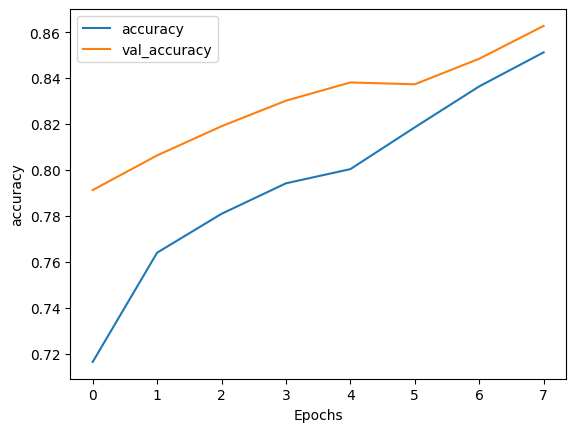

In [124]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

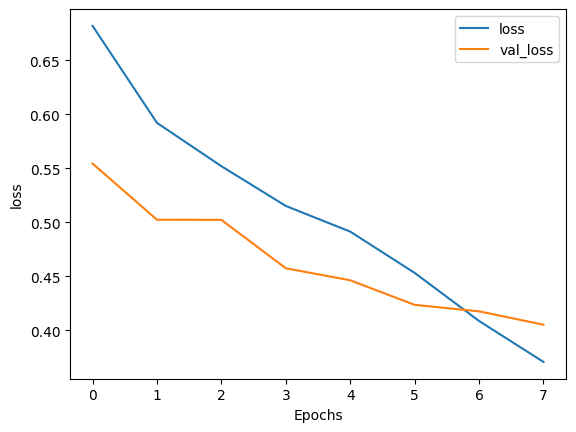

In [125]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [132]:
## test model with predict one example sentence
sample_text = ["tidak suka dengan pelayanan yang diberikan oleh restoran ini"]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 2:
        return 'positive'
    if predict == 1:
        return 'negative'
    if predict == 0:
        return 'neutral'
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.01286001 0.7459952  0.24114479]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
negative


In [127]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1260,)
(1260, 3)
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       131
           1       0.84      0.80      0.82       394
           2       0.90      0.93      0.92       735

    accuracy                           0.86      1260
   macro avg       0.81      0.80      0.81      1260
weighted avg       0.86      0.86      0.86      1260



In [128]:
#save model
model.save('./model/model-cnn-word2vec-3-classes-no-stemming.h5')

In [100]:
import numpy as np
import tensorflow as tf

# Inisialisasi bobot kernel dengan ukuran 5
kernel_size = 5
num_filters = 1
embedding_dim = 8

# Membuat bobot kernel dengan inisialisasi Glorot uniform
initializer = tf.keras.initializers.GlorotUniform()
kernel_weights = initializer(shape=(kernel_size, embedding_dim, num_filters))

# Dibulatkan ke angka terdekat
kernel_weights_rounded = np.round(kernel_weights, decimals=2)

print("Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):")
print(kernel_weights_rounded)
print("Shape bobot kernel:", kernel_weights.shape)


Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):
[[[-0.19]
  [ 0.32]
  [ 0.33]
  [-0.01]
  [-0.2 ]
  [ 0.18]
  [-0.13]
  [ 0.36]]

 [[ 0.03]
  [-0.32]
  [-0.19]
  [-0.09]
  [-0.18]
  [-0.15]
  [-0.02]
  [-0.29]]

 [[-0.16]
  [-0.34]
  [-0.08]
  [-0.25]
  [-0.15]
  [ 0.28]
  [ 0.31]
  [ 0.17]]

 [[-0.2 ]
  [ 0.16]
  [ 0.36]
  [-0.21]
  [ 0.13]
  [-0.18]
  [ 0.31]
  [ 0.1 ]]

 [[ 0.35]
  [ 0.32]
  [ 0.13]
  [ 0.2 ]
  [-0.09]
  [-0.01]
  [ 0.07]
  [-0.17]]]
Shape bobot kernel: (5, 8, 1)
